[Home](../../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [1]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
import pickle

####  Step 2

Load the model for testing

In [2]:
filename = 'my_saved_model_v1.sav'
model_A = pickle.load(open(filename, 'rb'))


(Optional) Load a second model if you want to do comparative testing

In [3]:
filename = 'my_saved_model_v1.sav'
model_B = pickle.load(open(filename, 'rb'))

####  Step 3
Open and parse the test data CSV file and store the data as variable array data objects.

In [4]:
x_col = 'BMI'
testing_data = pd.read_csv('2.4.1.testing_data.csv')
x_test = np.array(testing_data[x_col]).reshape(-1,1)
y_test = np.array(testing_data['Target'])

#### Step 5

Plot the test data features, targets and linear regression model to visually evaluate the model.

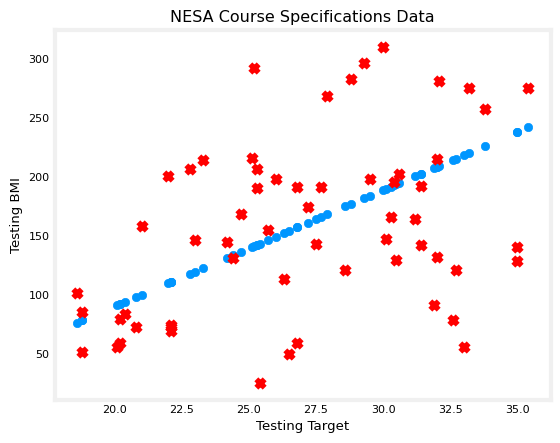

In [5]:
y_pred = model_A.predict(x_test)
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

#### Step 6

Use the 'score' method of the `LinearRegression` class to return a score based evaluation of the models accuracy or performance.

In [6]:
test_score = model_A.score(x_test, y_test)
print(f'Training data score: {test_score}')

Training data score: 0.1108687405006814


#### Step 7

Manually calculate and evaluate the 'loss' and 'cost' of the model using the test data.

In [7]:
table = pd.DataFrame({
    testing_data.columns[0]: x_test.flatten(),  # Flatten x for easy display
    testing_data.columns[1]: y_test,
    'Predicted result':model_A.predict(x_test),
    'Loss' : abs(model_A.predict(x_test).round(2) - y_test)**2
})
print(table)
cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()

print(f"The cost or average loss of this model is {cost}")

     DoB    DoT  Predicted result        Loss
0   25.7  155.0        146.032921     80.4609
1   33.0   55.0        218.128617  26611.3969
2   25.3  190.0        142.082472   2296.3264
3   29.5  198.0        183.562187    208.5136
4   20.8   72.0         97.639920    657.4096
5   27.2  174.0        160.847105    172.9225
6   26.3  113.0        151.958595   1517.8816
7   22.0  200.0        109.491267   8192.0601
8   27.7  191.0        165.785167    635.5441
9   32.0  215.0        208.252494     45.5625
10  18.6  101.0         75.912450    629.5081
11  21.0  158.0         99.615145   3408.2244
12  26.8   59.0        156.896656   9584.4100
13  32.1  281.0        209.240106   5149.4976
14  23.0  146.0        119.367390    709.1569
15  27.9  268.0        167.760391  10048.0576
16  22.1   69.0        110.478880   1720.5904
17  35.0  140.0        237.880862   9580.4944
18  32.7  121.0        215.165780   8867.9889
19  23.3  214.0        122.330227   8403.3889
20  30.0  310.0        188.500249 

You may want to do some manual predictions to understand your model.

In [8]:
print(model_A.predict([[0.1]]))
print(model_A.predict([[1]]))

[-106.79581943]
[-97.90730901]


#### Step 8

Evaluate the X axis intercept and gradient or coefficient of your model by using the getter methods to return the intercept and coefficient from my_model() object.

In [9]:
print(f'X Axis intercept: {model_A.intercept_}')
print(f'Coefficient: {model_A.coef_}')

X Axis intercept: -107.78343169959655
Coefficient: [9.87612268]


#### Step 9. Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [10]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [11]:
mx_col = ['BMI','BP','FDR']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

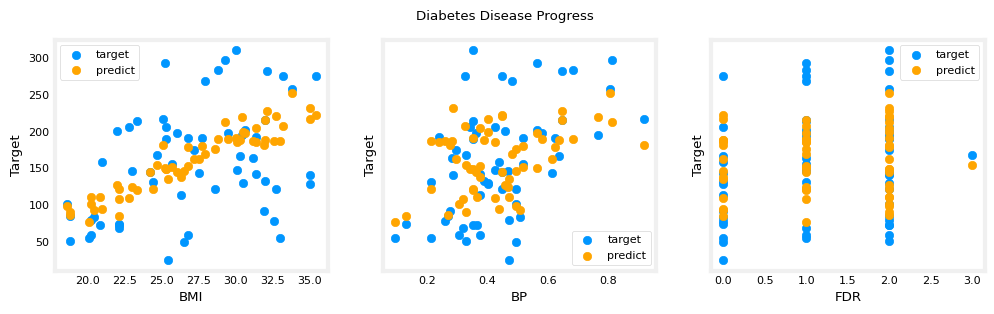

In [12]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [13]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.2775939265165436


In [14]:
print(model_C.predict([[0.1,0.1,0.1]]))
print(model_C.predict([[1,0.5,1]]))

[-110.75107011]
[-68.4949494]


In [15]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Loss'] = abs(model_C.predict(mx_test).round(2) - my_test)**2
table = pd.DataFrame(data)

cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()
print(f"The cost or average loss of this model is {cost}")

print(table)

The cost or average loss of this model is 1956.3373881355935
     BMI        BP  FDR  Target  Predicted result        Loss
0   25.7  0.517647  1.0   155.0        151.624333     11.4244
1   33.0  0.211765  0.0    55.0        186.691067  17342.2561
2   25.3  0.352941  2.0   190.0        149.184460   1666.2724
3   29.5  0.580353  1.0   198.0        189.130289     78.6769
4   20.8  0.364706  2.0    72.0        109.991029   1443.2401
5   27.2  0.294118  2.0   174.0        162.463725    133.1716
6   26.3  0.376471  0.0   113.0        137.270810    589.0329
7   22.0  0.458824  2.0   200.0        126.345985   5424.3225
8   27.7  0.517647  2.0   191.0        180.466137    110.8809
9   32.0  0.647059  1.0   215.0        215.350198      0.1225
10  18.6  0.494118  2.0   101.0         98.335968      7.0756
11  21.0  0.439176  0.0   158.0         94.074833   4087.0449
12  26.8  0.376471  1.0    59.0        152.810097   8800.3161
13  32.1  0.647059  2.0   281.0        227.342148   2879.3956
14  23.0 

In [16]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -118.81841781390196
Coefficient: [ 8.86834434 60.70001725 11.10511545]


#### Step 10. Polynomial Linear Regression

You should be able to understand the code snippets with less guidelines.

In [17]:
model_filename = 'my_saved_model_v3.sav'
poly_filename = 'my_saved_poly_v3.pkl'

model_D = pickle.load(open(model_filename, 'rb'))
poly = pickle.load(open(poly_filename, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'my_saved_poly_v3.pkl'

In [ ]:
mx_col = ['BMI']
testing_data = pd.read_csv('2.4.1.testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

In [ ]:
poly_features = poly.fit_transform(mx_test)

In [ ]:
y_pred = model_D.predict(poly_features)

plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, marker='x', c='r')
plt.title("NESA Course Specifications Data")
plt.ylabel(f'Testing {x_col}')
plt.xlabel(f'Testing Target')
plt.show()

In [ ]:
test_score = model_D.score(poly_features, my_test)
print(f'Training data score: {test_score}')

In [ ]:
new_poly_feature = poly.fit_transform([[0.1]])
print(model_D.predict(new_poly_feature))

In [ ]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_D.predict(poly_features)
data['Loss'] = abs(model_D.predict(poly_features).round(2) - my_test)**2
table = pd.DataFrame(data)

cost = 1 / (2 * table.shape[0]) * table['Loss'].sum()
print(f"The cost or average loss of this model is {cost}")

print(table)

#### Step 11

When your model is ready for operations, move it to the [3.Operations\3.1.Deploy_Model](\3.Operations\3.1.Deploy_Model) folder.